# Gradient Descent

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
x = np.arange(10)
y =(x-5)**2

In [8]:
plt.style.use("seaborn")

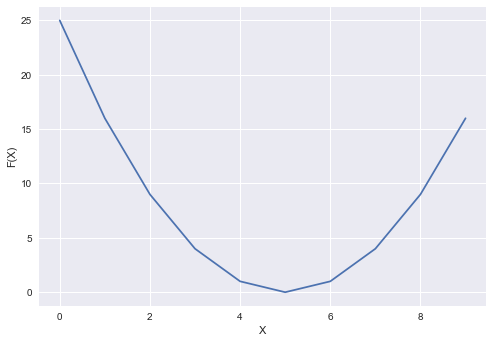

In [12]:
plt.plot(x,y)
plt.ylabel("F(X)")
plt.xlabel("X")
plt.show()

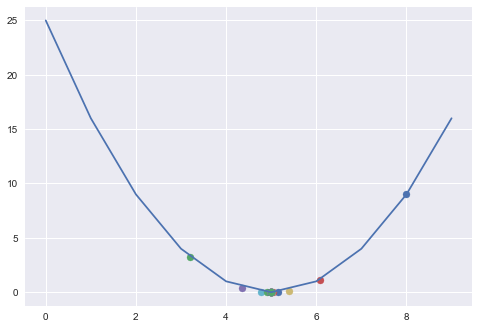

In [31]:
x_lr = 0
lr =.8
error = []
plt.plot(x,y)
for i in range(50):
    grad = 2*(x_lr-5)
    x_lr = x_lr - lr*grad
    e = (x_lr-5)**2
    error.append(e)
    plt.scatter(x_lr,e)
#     print(x_lr)
# plt.scatter(error)
plt.show()

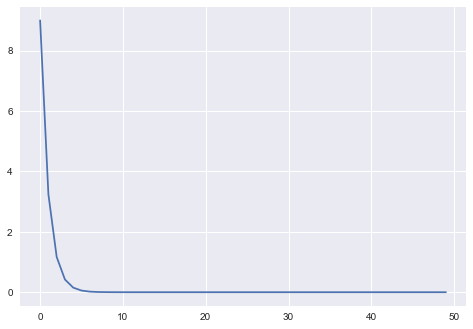

In [28]:
plt.plot(error)

# Linear regression 

In [54]:
x_data = pd.read_csv("../data/hard_work_pays_off_challenge_data/Linear_X_Train.csv")
y_data = pd.read_csv("../data/hard_work_pays_off_challenge_data/Linear_Y_Train.csv")

In [55]:
print(x_data.shape,y_data.shape)

(3750, 1) (3750, 1)


In [56]:
x_data = x_data.values
y_data = y_data.values

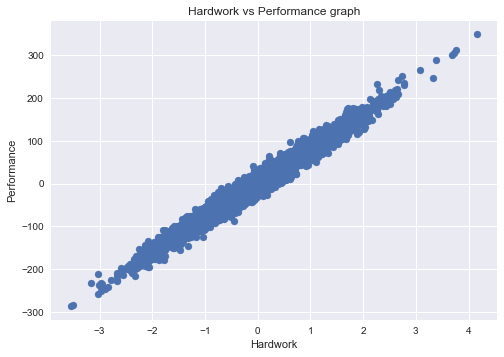

In [62]:
plt.scatter(x_data,y_data)
plt.title("Hardwork vs Performance graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [63]:
u = np.mean(x_data)
s = np.std(x_data)

(-0.03779466168006855, 0.9920801322508517)

In [59]:
x_data = (x_data -u)/s

In [184]:
def hypothesis(x,theta):
    n =theta.shape[0]
    y_hat = theta[0] + x*theta[1]
    return y_hat

In [233]:
def gradient_desent(x_data,y_data,thetha):
    y_hat = hypothesis(x_data,thetha)
    thetha[0] = thetha[0] - lr*np.sum(y_hat-y_data)/y_data.shape[0]
    thetha[1] = thetha[1] - lr*np.sum((y_hat-y_data)*x_data)/y_data.shape[0]
    return thetha

In [132]:
def error(y_data,y_hat):
    e = y_hat - y_data
    e = e*e
    e = sum(e)
    e =e/y_data.shape[0]
    return e

In [244]:
thetha =np.zeros(2)
lr =.1
error_list =[]
theta_list =[]

#### theta_0 = theta_0  - (lr/m)* sigma(y_hat-y_data)
#### theta_1 = theta_1  - (lr/m)* sigma((y_hat-y_data)*x_data)
#### theta_n = theta_n - (lr/m)* sigma((y_hat-y_data)*(x_data)^n)

In [245]:
for i in range(30):
    thetha = gradient_desent(x_data,y_data,thetha)
    y_hat = hypothesis(x_data,thetha)
    theta_list.append((thetha[0],thetha[1]))
    error_list.append(error(y_data,y_hat))
# theta_list    

In [106]:
x_test = pd.read_csv("../data/hard_work_pays_off_challenge_data/Linear_X_Test.csv")

In [109]:
x_test = x_test.values

In [110]:
y_ans = hypothesis(x_test,thetha)

In [111]:
y_ans = pd.DataFrame(y_ans,columns=["y"])

In [112]:
y_ans

,y
0,-149.374663
1,-68.756767
2,-201.492222
3,221.240119
4,47.908170
...,...
1245,-12.744968
1246,75.173799
1247,10.912428
1248,-21.532930


In [114]:
y_ans.to_csv("../data/hard_work_pays_off_challenge_data/ans.csv",index=False)

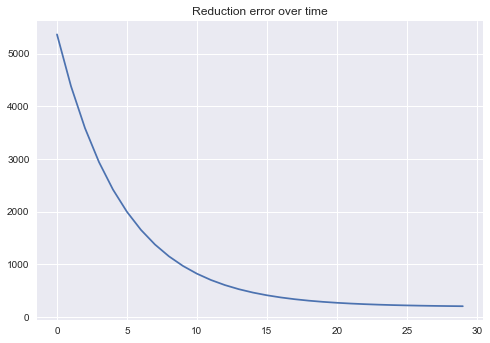

In [203]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

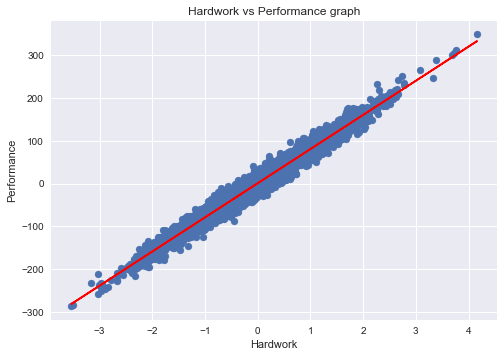

In [156]:
plt.scatter(x_data,y_data)
plt.plot(x_data,hypothesis(x_data,thetha),color="red")
plt.title("Hardwork vs Performance graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [159]:
def r2_score(y_data,y_hat):
    u = np.mean(y_data)
    score = 1 - sum((y_data-y_hat)**2)/sum((y_data-u)**2)
    return score*100

In [161]:
score = r2_score(y_data,hypothesis(x_data,thetha))
print(score)

[97.09612234]


### Visualising Loss function,Gradient Descent,Theta Updates

In [162]:
from mpl_toolkits.mplot3d import Axes3D

In [180]:
T0 = np.arange(-40,40)
T1 = np.arange(40,120)
T0,T1 = np.meshgrid(T0,T1)

In [181]:

J = np.zeros(T0.shape)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        J[i][j] = error(y_data,hypothesis(x_data,np.array([T0[i][j],T1[i][j]] ) ) )
# J = error(y_data,hypothesis(x_data,np.array([T0,T1])))

plt.show()

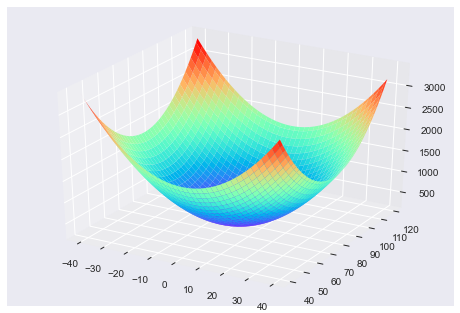

In [182]:
fig = plt.figure()
axes = fig.gca(projection = "3d")
axes.plot_surface(T0,T1,J,cmap ="rainbow")
plt.show()

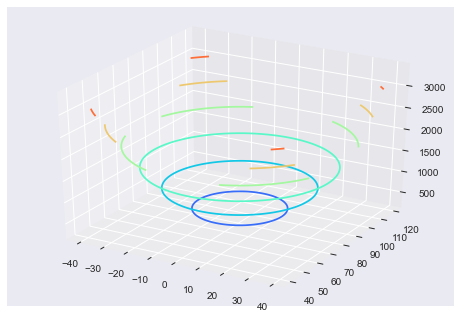

In [183]:
fig = plt.figure()
axes = fig.gca(projection = "3d")
axes.contour(T0,T1,J,cmap ="rainbow")
plt.show()

In [246]:
theta_list = np.array(theta_list)

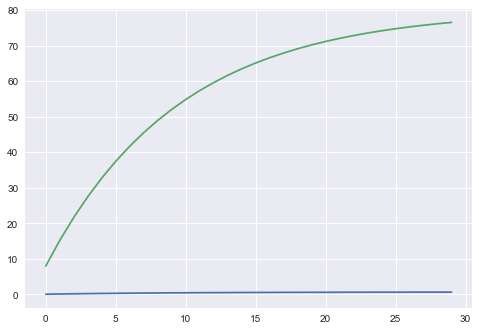

In [247]:
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")

#### Trajectory traced by Theta Updates in the Loss Function 

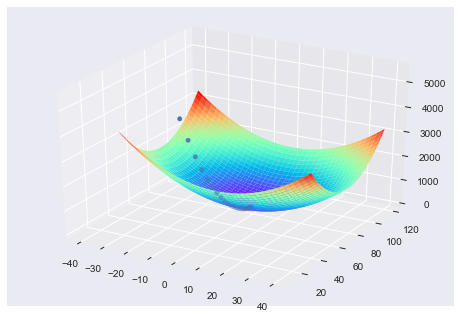

In [249]:
fig = plt.figure()
axes = fig.gca(projection = "3d")
axes.plot_surface(T0,T1,J,cmap ="rainbow")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

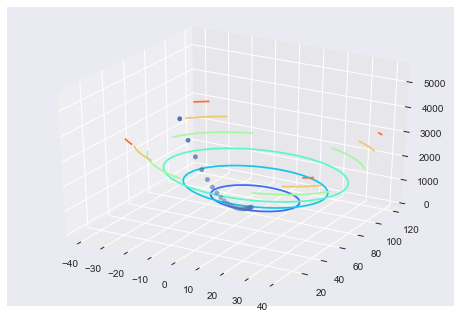

In [252]:
fig = plt.figure()
axes = fig.gca(projection = "3d")
axes.contour(T0,T1,J,cmap ="rainbow")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

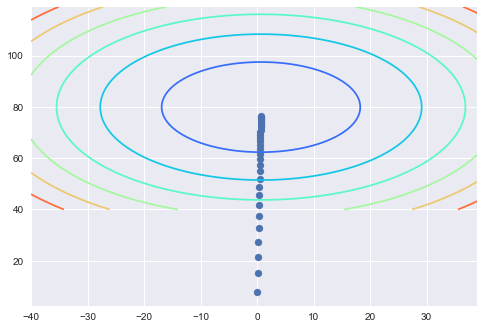

In [255]:
plt.contour(T0,T1,J,cmap="rainbow")
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()